In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Loading the dadtaset
df = pd.read_csv("volve_production_data.csv",index_col=0,parse_dates=True)
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Exploring the data to find issues, outliers and insights
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

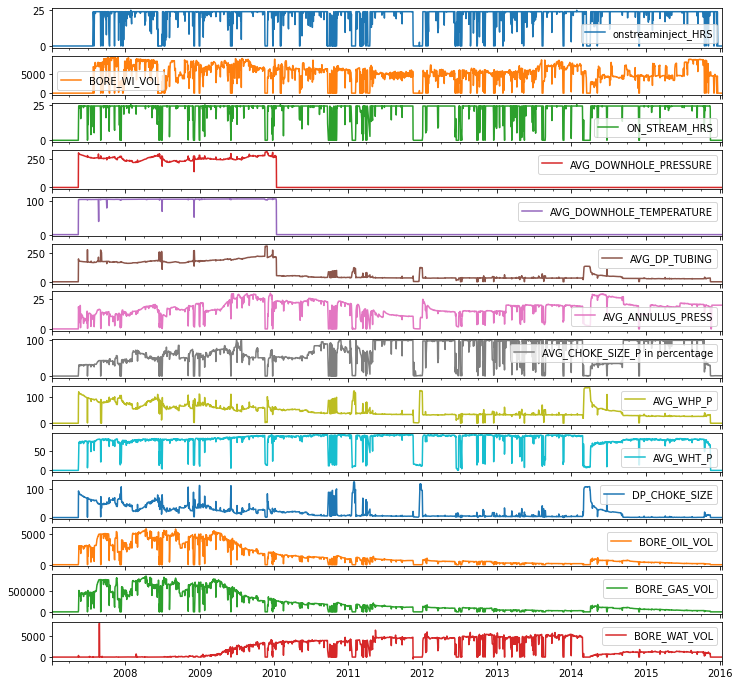

In [23]:
df.plot(subplots=True,figsize=(12,12))

<AxesSubplot:>

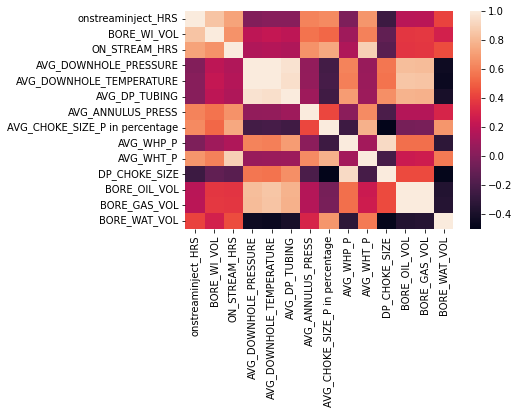

In [24]:
#Setting output columns, avoiding too high/low correlation magnitudes
output_column = 'BORE_OIL_VOL'

#Analysing the intercorrelation
sns.heatmap(df.corr())


#Intercorrelation is high when his vaalue is 0,9 or more
#Intercorrelation is low when his value is 0,2 or less
#Seems like BORE OIL VOL has a nice correlation with DP CHOKE SIZE and ON STREAM HRS

<AxesSubplot:>

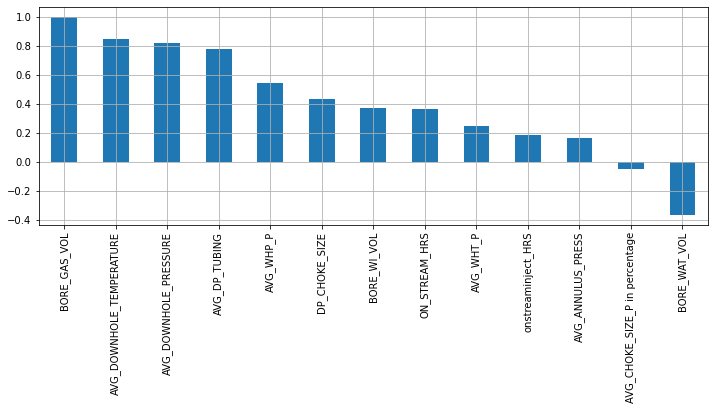

In [26]:
#New view of correlation values for BORE_OIL_VOL
df.corr()[output_column].sort_values(ascending=False)[1:].plot(kind='bar',figsize=(12,4),grid=True)

In [27]:
#Another visualization of correlations with BORE_OIL_VOL
corr_df = pd.DataFrame(df.corr()[output_col].sort_values(ascending=False)[1:])
corr_df.columns=['Correlation']
corr_df

,Correlation
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [28]:
#Setting input_columns
#The features with a magnitude's correlation between 0,2 and 0,9 will be added to input columns 
input_columns = corr_df[(abs(corr_df['Correlation'])>0.2) & (corr_df['Correlation']<0.9)].index
input_columns

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

In [30]:
#Setting up a matrix with input x output
x = df[input_columns]
y = df[output_column]

In [32]:
#Inicializing a validation split
#We need to see how much rows this dataset have and split for a validation
df.describe()

#So 3000 is gonna be used for train and 291 for test

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [50]:
#Validation Split
#80% of my data will be used for a trainmodel
#20% of my data will be used for a test validation
#remind that x is 9 inputs column with 3291 rows each 
#and y is output column with 3291 rows
#slicing is hard to undestand sometimes xDDDDD
train_length = 3000 #days

x_train , y_train = x.iloc[:train_length,:] , y[:train_length]
x_test , y_test = x.iloc[train_length:,:] , y[train_length:]

In [52]:
#Selecting a feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [54]:
#Applying the scaler
scaler = StandardScaler() #MinMaxScaler
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
#Applying multiple lineaer regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [56]:
#Fitting x_train_scaled to make predictions of it
lm.fit(x_train_scaled,y_train)

#Passing the training date to linear model
yp_train = lm.predict(x_train_scaled)

#Now we have all set up to plot predicted graphs

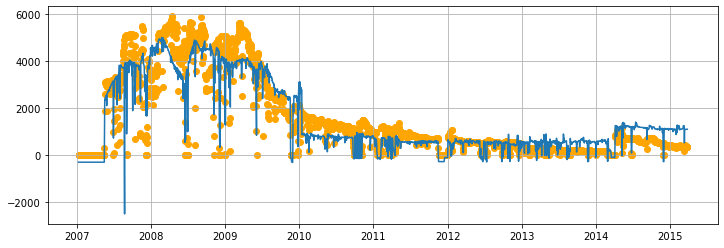

In [58]:
#Plotting the prediction graph
plt.figure(figsize=(12,4))
plt.scatter(df.index[:train_length],y_train, color='orange')
plt.plot(df.index[:train_length], yp_train)
plt.grid()

#This prediction wasnt good enough. So we need to perform it

In [67]:
#Testing with the data splitted for test
yp_test = lm.predict(x_test_scaled)

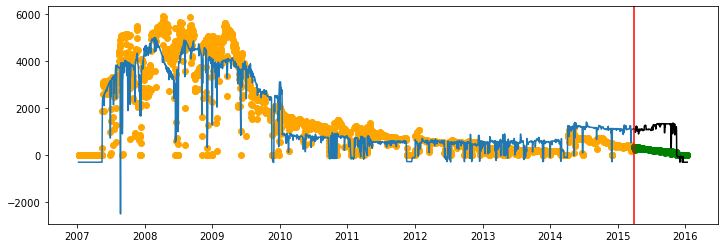

In [68]:
#Plotting the prediciton graph again
plt.figure(figsize = (12,4))
plt.scatter(df.index[:train_length],y_train,color='orange')
plt.plot(df.index[:train_lenght],yp_train)

#Plotting the prediction graph with test values of actual data
plt.scatter(df.index[train_length:],y_test, color ='green')
plt.plot(df.index[train_length:],yp_test,color = 'black')

#Line in red to separate after train_length value
plt.axvline(df.index[train_length],color ='red')

#This plot show how ineffective this model is

In [71]:
#Testing RandomForest Regressor Model
#This model takes random split of the data and predicts the values

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

#Fitting model to x_train and y_train
rf.fit(x_train, y_train)
yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)


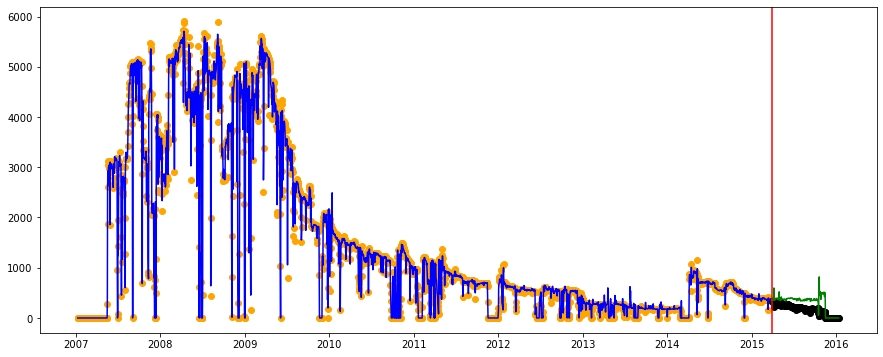

In [73]:
#Plotting and analyzing the prediction

#Plot for prediction
plt.figure(figsize=(15,6))
plt.scatter(df.index[:train_length],y_train,color='orange')
plt.plot(df.index[:train_length],yp_train,color='blue')

#Plot for validation test
plt.scatter(df.index[train_length:],y_test,color='black')
plt.plot(df.index[train_length:],yp_test,color='green')

#Plot delimiter
plt.axvline(df.index[train_lenght],color='red')

In [ ]:
#Setting model to a per month production
